## Proyecto Final Matemática y Estadística para la ciencia de Datos

### El objetivo de esta tarea es aplicar el conocimiento adquirido a través de un análisis exhaustivo de estadística descriptiva y modelos de regresión lineal a un conjunto de datos transversales. Esto nos permitirá desarrollar uno o varios modelos predictivos que proporcionen información sobre diversos parámetros de la población y la interacción entre variables, basándonos en las inferencias derivadas de los estadísticos obtenidos de los distintos modelos propuestos.
### Para estos análisis, se empleará un problema relacionado con la construcción de proyectos inmobiliarios. La construcción de estos proyectos en las comunas genera tanto ingresos como gastos para los municipios. Se ha realizado un levantamiento de información para estudiar este fenómeno, recolectando datos de 914 municipios. El problema consiste en investigar la relación entre diversas características de cada comuna y los gastos municipales por persona, generados por la gestión de dichos proyectos. Los datos se encuentran en el archivo gasto.txt e incluyen las siguientes variables:
 
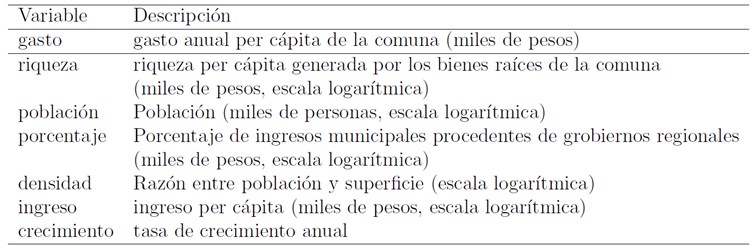

### Pregunta 1: Realice un análisis de estadística descriptiva de las variables que incluya gráficos de acuerdo a la distribución de las variables y a la relación que tienen entre ellas, considerando la variable gasto como la variable objetivo.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# read text file into pandas DataFrame and create 
# header with names
df = pd.read_csv(R"C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Universidad Ricardo Palma\MATEMÁTICA Y ESTADÍSTICA EN CIENCIA DE DATOS\codigo\base de datos\gasto.csv")

In [10]:
def describe_dataframe(df):
  column_descriptions = []

  for column in df.columns:
      #print(column)
      column_info = {}
      column_info['variable'] = column

      # Calcular el porcentaje de valores nulos
      null_percentage = df[column].isnull().mean() * 100
      column_info['nulos'] = round(null_percentage, 2)

      # Determinar el tipo de variable
      unique_values = df[column].nunique()
      total_values = len(df[column])
      if pd.api.types.is_object_dtype(df[column]): #pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_string_dtype(df[column]) or
          column_info['tipo'] = 'Categorical'
          column_info['etiquetas'] = unique_values
      elif pd.api.types.is_numeric_dtype(df[column]):
          if unique_values / total_values < 0.1:
          # if unique_values < 30:
              column_info['tipo'] = 'Discrete'
              column_info['etiquetas'] = unique_values
          else:
              column_info['tipo'] = 'Continuous'
              column_info['etiquetas'] = 'N/A'  # No aplicable para variables continuas
      else:
          column_info['tipo'] = 'Other'
          column_info['etiquetas'] = 'N/A'  # No aplicable para otras variables

      # Verificar la presencia de outliers (solo para variables numéricas)
      if pd.api.types.is_numeric_dtype(df[column]):
          q1 = df[column].quantile(0.25)
          q3 = df[column].quantile(0.85)
          iqr = q3 - q1
          lower_bound = q1 - 1.5 * iqr
          upper_bound = q3 + 1.5 * iqr
          outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
          column_info['outliers'] = 'Yes' if outliers > 0 else 'No'
      else:
          column_info['outliers'] = 'N/A'  # No aplicable para variables no numéricas

      column_descriptions.append(column_info)

  return pd.DataFrame(column_descriptions)

In [11]:
df.head()

,gasto,riqueza,poblacion,porcentaje,densidad,ingreso,crecimiento
0,2212,10.28139,3.963033,1.840550,3.891820,6.467938,20.6
1,2415,10.62333,6.152839,1.960095,6.359574,6.937865,13.4
2,2086,10.56978,4.333361,3.178054,4.543295,6.650754,-4.0
3,3360,10.62636,6.982058,2.197225,7.174724,6.718364,3.9
4,2107,10.52098,6.133000,2.351375,6.180017,6.898839,8.0


In [12]:
df.shape

(914, 7)

In [13]:
df.columns.values

array(['gasto', 'riqueza', 'poblacion', 'porcentaje', 'densidad',
       'ingreso', 'crecimiento'], dtype=object)

In [14]:
df.dtypes

gasto            int64
riqueza        float64
poblacion      float64
porcentaje     float64
densidad       float64
ingreso        float64
crecimiento    float64
dtype: object

### analizando estadisticos de las variables numericas

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gasto,914.0,2056.728665,1887.744715,371.000000,1204.000000,1589.000000,2212.000000,23002.000000
riqueza,914.0,10.241918,0.627376,8.597999,9.799330,10.108625,10.544218,12.939230
poblacion,914.0,3.782013,1.143213,0.139762,3.043523,3.591356,4.385508,8.968869
porcentaje,914.0,2.825907,0.521651,0.530628,2.517696,2.833213,3.177010,4.228293
densidad,914.0,4.140836,1.296425,0.000000,3.401197,3.960768,4.709530,8.740657
ingreso,914.0,6.393258,0.277836,4.950999,6.227526,6.361191,6.521368,7.763459
crecimiento,914.0,8.100438,17.434344,-54.100000,-0.300000,6.100000,13.700000,294.500000


### Analizando estadisticos de las variables categoricas

In [16]:
#df.describe(include="object").T  #no existen variables categoricas, por eso sale error

In [17]:
#Buscando datos nullos
df.isnull().sum()

gasto          0
riqueza        0
poblacion      0
porcentaje     0
densidad       0
ingreso        0
crecimiento    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gasto        914 non-null    int64  
 1   riqueza      914 non-null    float64
 2   poblacion    914 non-null    float64
 3   porcentaje   914 non-null    float64
 4   densidad     914 non-null    float64
 5   ingreso      914 non-null    float64
 6   crecimiento  914 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 50.1 KB


In [19]:
df_resumen = describe_dataframe(df)
df_resumen

,variable,nulos,tipo,etiquetas,outliers
0,gasto,0.0,Continuous,N/A,Yes
1,riqueza,0.0,Continuous,N/A,Yes
2,poblacion,0.0,Continuous,N/A,Yes
3,porcentaje,0.0,Continuous,N/A,Yes
4,densidad,0.0,Continuous,N/A,Yes
5,ingreso,0.0,Continuous,N/A,Yes
6,crecimiento,0.0,Continuous,N/A,Yes


<Axes: >

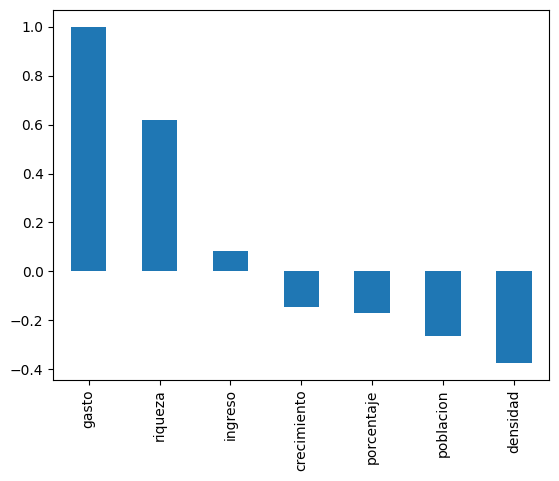

In [20]:
df.corr()['gasto'].sort_values(ascending = False).plot(kind='bar')

Se puede observar que la variable gasto tiene una alta correlación con la variable riqueza

<Axes: >

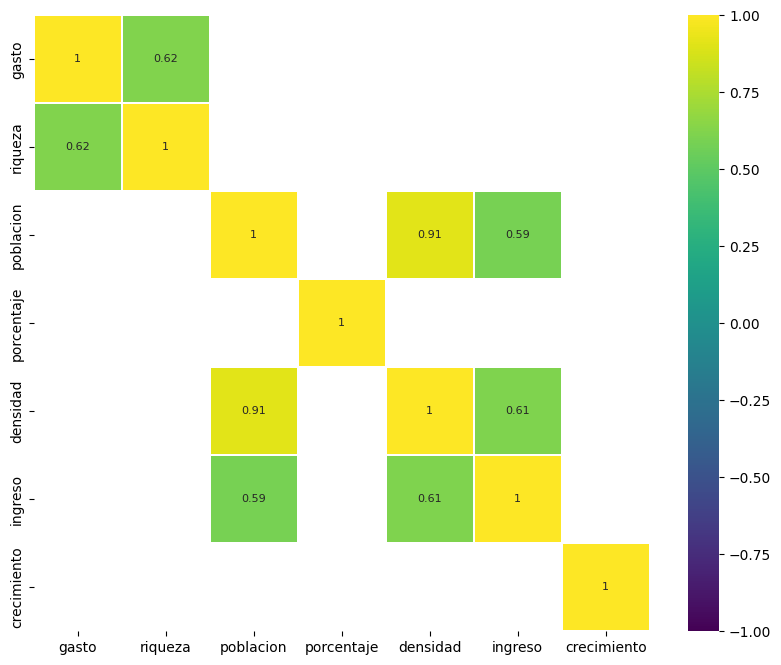

In [21]:
var_num = df_resumen.variable.to_list()
plt.figure(figsize=(10,8))
corr = df[var_num].corr() # We already examined SalePrice correlations
k = 0.5
sns.heatmap(corr[(corr >= k) | (corr <= -k)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [22]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
gasto          0
riqueza        0
poblacion      0
porcentaje     0
densidad       0
ingreso        0
crecimiento    0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [23]:
#sns.pairplot(df)
df.columns.tolist()

['gasto',
 'riqueza',
 'poblacion',
 'porcentaje',
 'densidad',
 'ingreso',
 'crecimiento']

### Pregunta 2 Realice un modelo de regresión lineal múltiple utilizando la variable gasto como la variable respuesta. Analice las métricas de rendimiento vistas en clase. Para este caso, utilice el 75% de los datos para realizar las validaciones del modelo.

In [24]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse


def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [25]:
y = df["gasto"]
X = df.drop('gasto',axis=1)
y

0      2212
1      2415
2      2086
3      3360
4      2107
       ... 
909    2912
910     609
911    1428
912     868
913    2058
Name: gasto, Length: 914, dtype: int64

In [26]:
columns = X.columns.values
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

Pregunta 3 Valide los supuestos del modelo vistos en clase para regresión lineal múltiple a través de la formulación de pruebas de hipótesis e intuición visual de los gráficos. En caso de que no se cumpla uno o más de los supuestos, comente y analice la posible causa de esto.

In [29]:
# 1. Linealidad - Gráfico de dispersión
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Agregar constante para la intersección
X = sm.add_constant(X)
X.shape


(914, 7)

In [30]:
# Ajustar el modelo
model = sm.OLS(y, X).fit()

df1 = pd.DataFrame({'Scores': y})
df1['predictions'] = model.predict(X)
df1['residuals'] = df1['Scores'] - df1['predictions']
df1


,Scores,predictions,residuals
0,2212,2746.592020,-534.592020
1,2415,1937.339459,477.660541
2,2086,2301.401460,-215.401460
3,3360,1559.667757,1800.332243
4,2107,1744.218031,362.781969
...,...,...,...
909,2912,2690.883218,221.116782
910,609,2705.080442,-2096.080442
911,1428,1181.122104,246.877896
912,868,1949.495391,-1081.495391


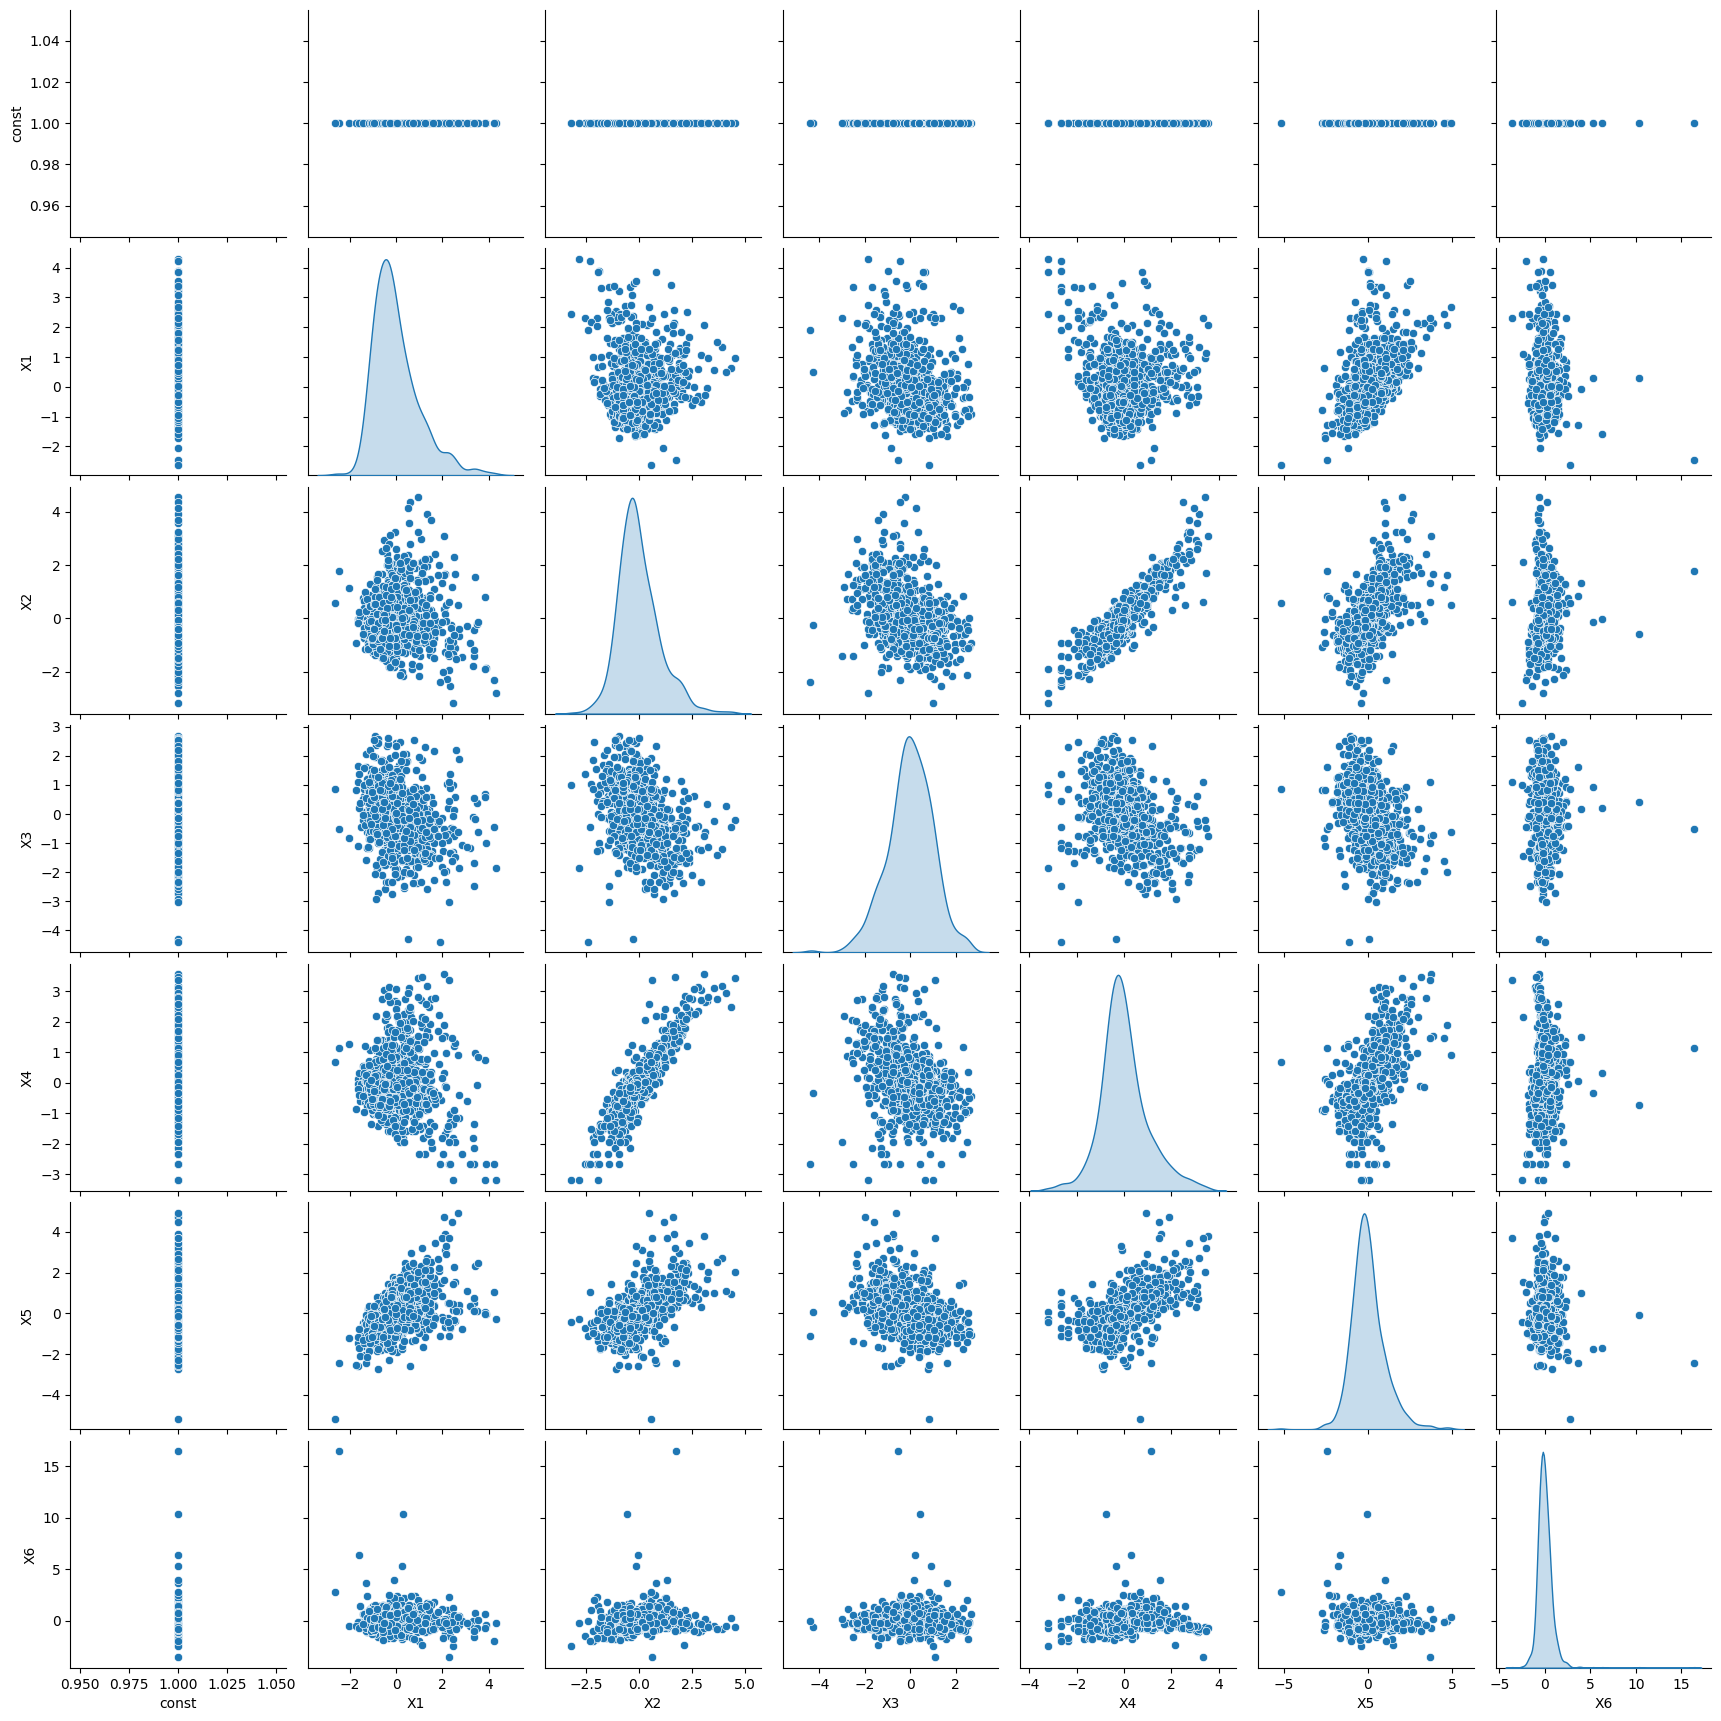

In [31]:
# 1. Linealidad - Gráfico de dispersión
sns.pairplot(pd.DataFrame(X, columns=['const', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']), diag_kind='kde')
plt.show()

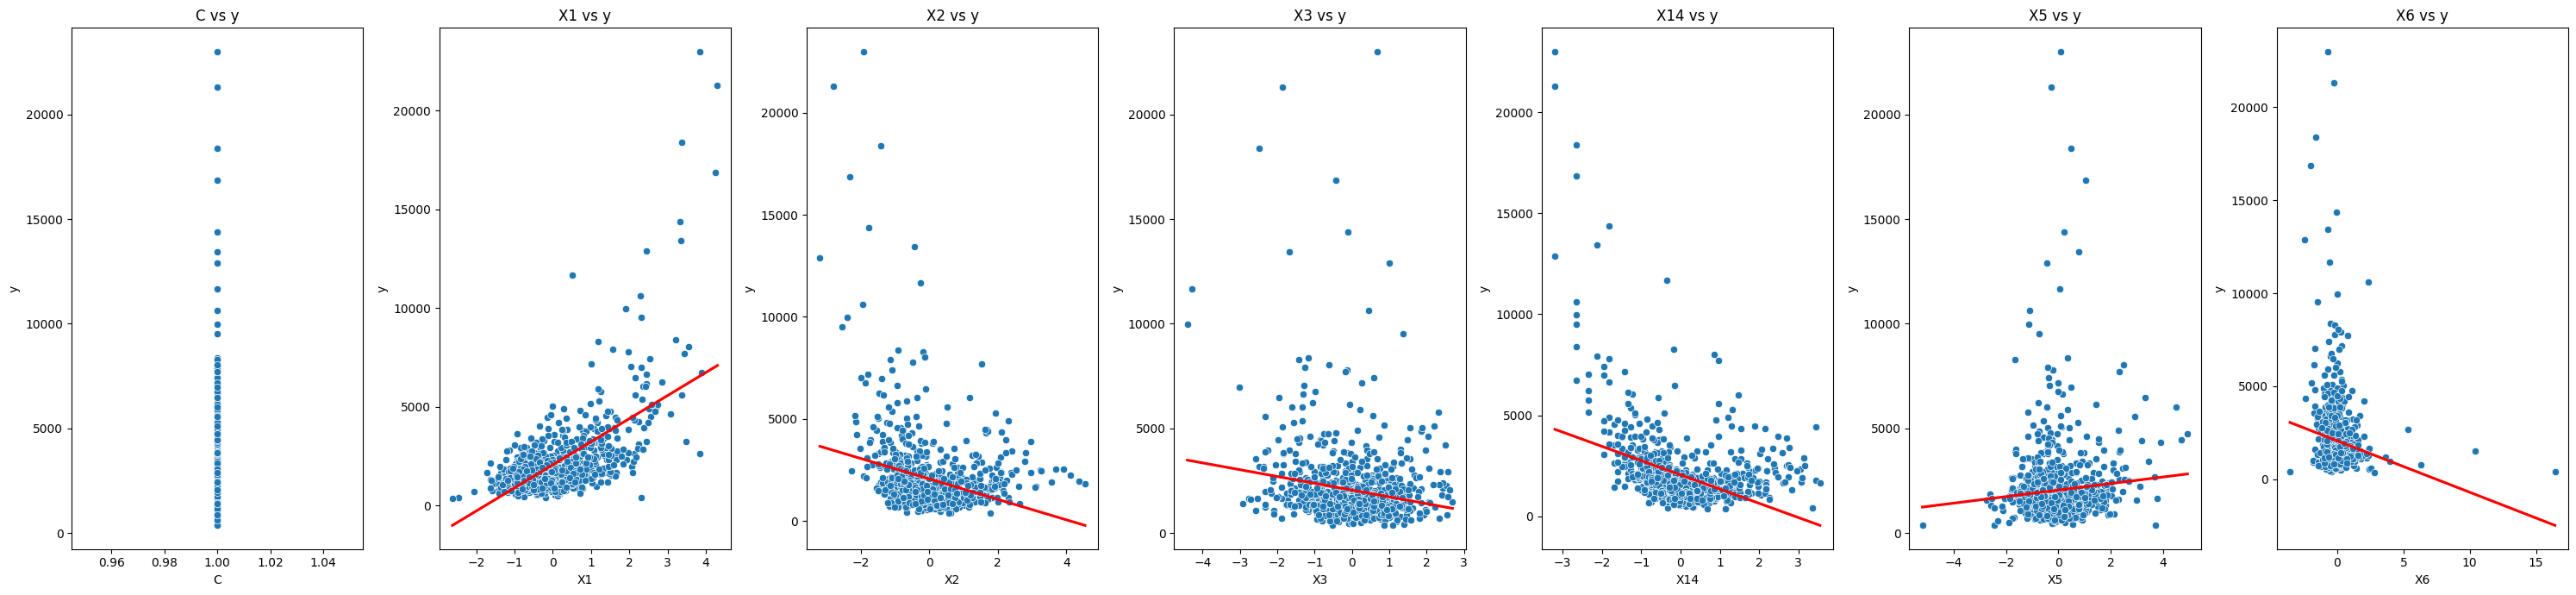

In [32]:
fig, axs = plt.subplots(1, 7, figsize=(30, 7))
for i, predictor in enumerate(['C','X1','X2','X3','X14','X5','X6']):

    sns.scatterplot(x=X[:,i], y=y, ax=axs[i])
    sns.regplot(x=X[:,i], y=y, ax=axs[i], scatter=False, color='red', ci=None)
    axs[i].set_title(f'{predictor} vs y')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('y')

plt.tight_layout()
plt.show()

En el test de linealidad se observar que no hay una tendencia lineal muy marcada que presentan las variables frente a la variable objetivo

In [33]:
# 2. Independencia - Prueba de Durbin-Watson
dw = sm.stats.durbin_watson(model.resid)
print(f'Durbin-Watson: {dw}')

Durbin-Watson: 1.7227615481731158


El test de independencia no muestra un valor cercano a 2 con lo cual podemos concluir que no hay autocorrelacion significativa

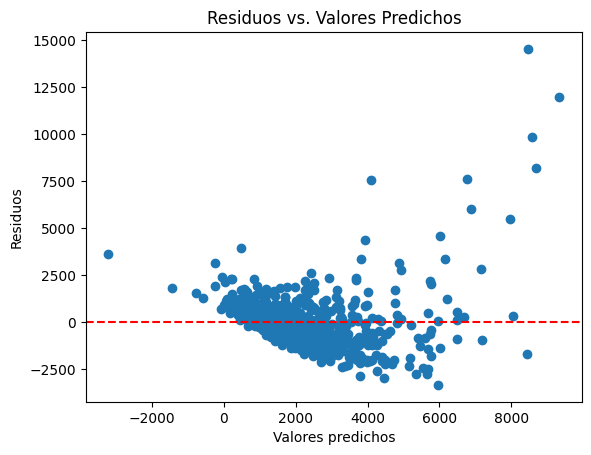

{'Lagrange multiplier statistic': 142.10571789266288, 'p-value': 3.6015671856580353e-28, 'f-value': 27.829779525585828, 'f p-value': 1.3399105479603422e-30}


In [34]:
# 3. Homoscedasticidad - Gráfico de residuos vs. valores predichos
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Predichos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Prueba de Breusch-Pagan para homoscedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df1['residuals'], X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))
# Pueba de hipotesis
# Los residuos del modelo son homocedásticos (p-values mayores a 0.05).

En la prueba de homoscedasticidad la variancia de los residuos parece variar con los valores predichos, con lo cual podemos la homoscedasticidad no se cumple

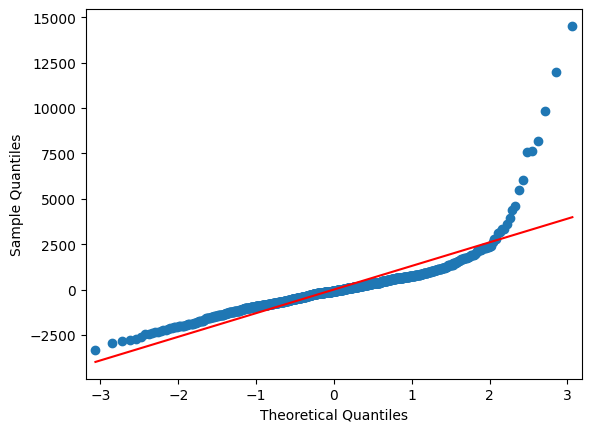

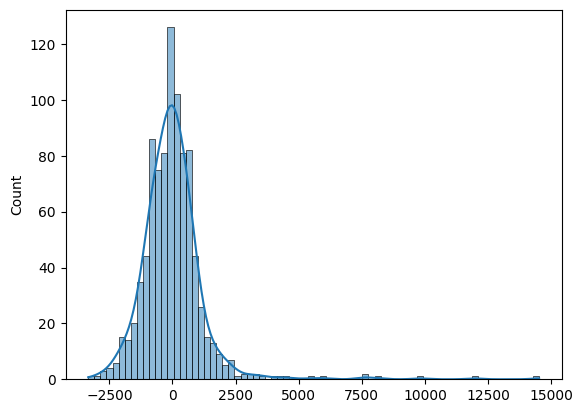

Prueba de Shapiro-Wilk: ShapiroResult(statistic=0.7556678278808302, pvalue=1.1129886848259946e-34)
Prueba de Kolmogorov-Smirnov: KstestResult(statistic=0.5448272276447115, pvalue=7.219919790039368e-255, statistic_location=-4.008595970816259, statistic_sign=1)


In [35]:
from scipy.stats import shapiro, kstest

# 4. Normalidad de los errores - Histograma y gráfico Q-Q
sm.qqplot(model.resid, line='s')
plt.show()

sns.histplot(model.resid, kde=True)
plt.show()

shapiro_test = shapiro(df1['residuals'])
print(f'Prueba de Shapiro-Wilk: {shapiro_test}')

# Alternativamente, prueba Kolmogorov-Smirnov
ks_test = kstest(df1['residuals'], 'norm')
print(f'Prueba de Kolmogorov-Smirnov: {ks_test}')

#prueba de hipotesis, mayores a 0.5 esta bien

La prueba de normalidad tienen una tendencia lineal hasta cierto punto, luego parece tener una tendencia exponencial, con lo cual no termina de pasar las prueba de normalidad

In [36]:
# 5. Multicolinealidad - VIF
vif = pd.DataFrame()
vif['variable'] = ['const', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)


  variable       VIF
0    const  1.000000
1       X1  2.055903
2       X2  6.412001
3       X3  1.319470
4       X4  7.792930
5       X5  3.031390
6       X6  1.066110


En la prueba de Multicolinealidad, los valores VIF de cada variable son menores a 10, si embargo la variable X4 muestra un valor alto, lo cual puede provocar problemas.

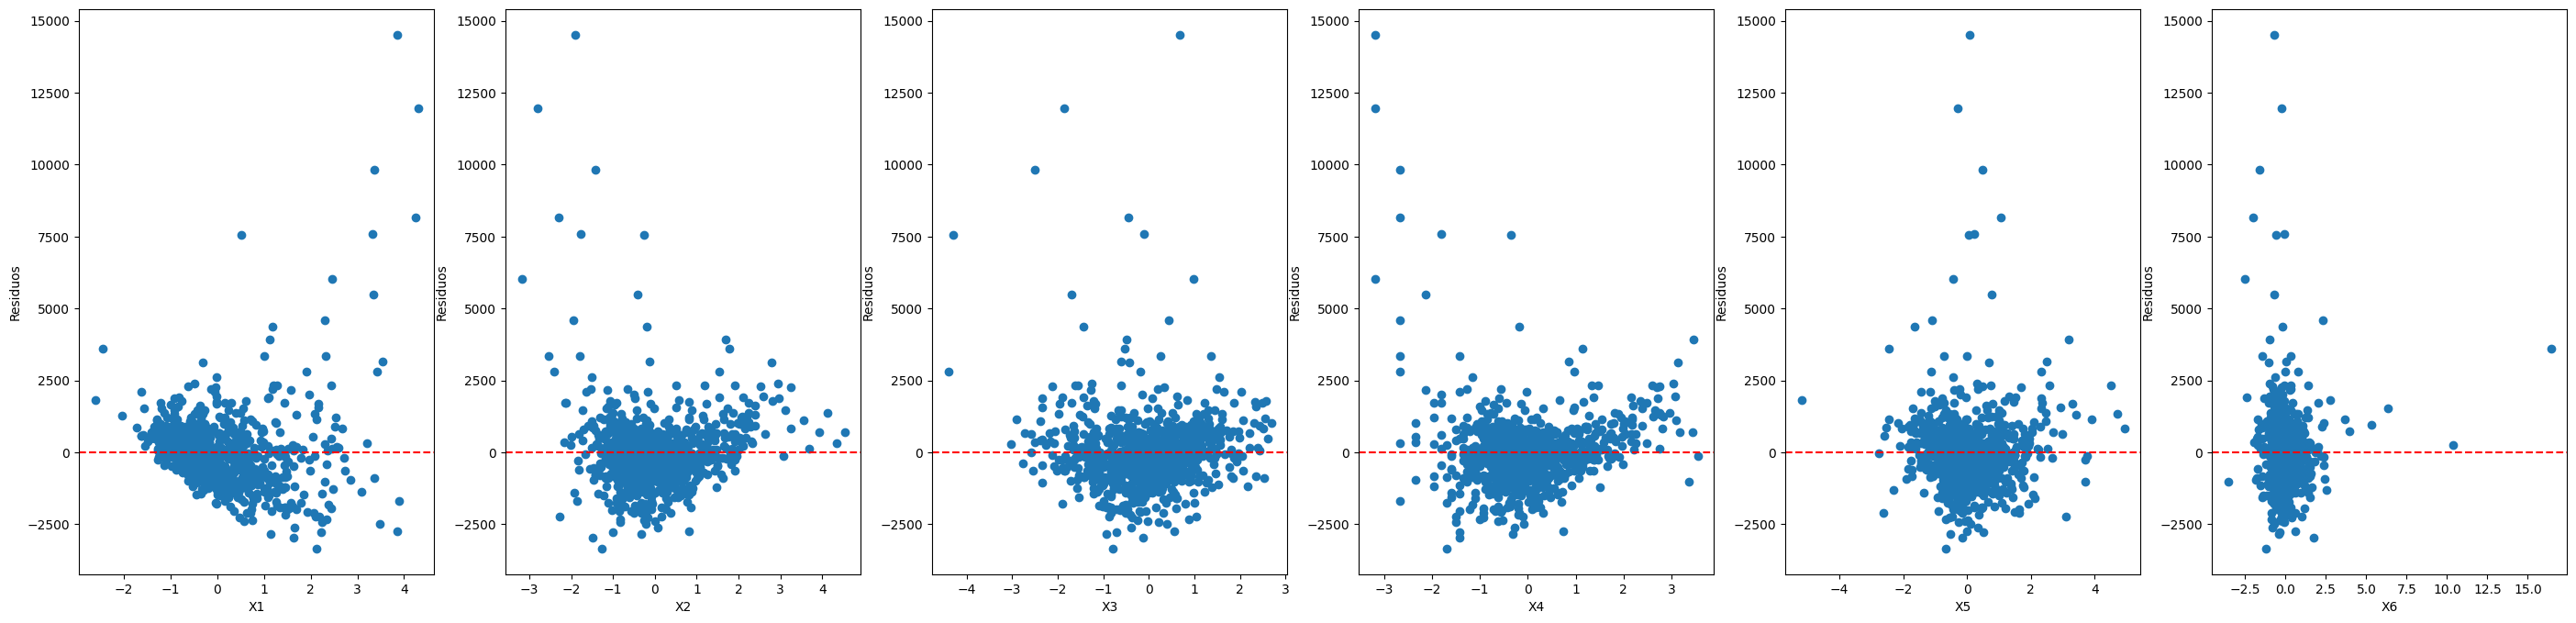

In [37]:
# 6. No correlación entre errores y variables independientes - Gráfico de residuos vs. cada predictor
fig, axs = plt.subplots(1, 6, figsize=(35 ,8))
for i in range(1, 7):
    axs[i-1].scatter(X[:, i], model.resid)
    axs[i-1].set_xlabel(f'X{i}')
    axs[i-1].set_ylabel('Residuos')
    axs[i-1].axhline(y=0, color='r', linestyle='--')
plt.show()

Se puede observar que hay cierta tendencia de cada variable predictora con sus residuos a generar ciertos patrones y aglomeración, lo cual puede ocacionar ciertos problemas de correlacion. 

### Pregunta 4: Asegurando que se cumplieron los supuestos, utilice el 25% de los datos que no se usó para entrenar el modelo para validar si este modelo predice de manera correcta nueva información. Utilice las métricas vistas en clase.

In [38]:
y_pred = model.predict(sm.add_constant(X_test))

def calculate_regression_metrics(y_true, y_pred):
    """
    Calcula métricas de regresión lineal.

    Parameters:
    - y_true: array-like, Valores verdaderos.
    - y_pred: array-like, Valores predichos.

    Returns:
    - metrics: dict, Diccionario que contiene las métricas calculadas.
    """
    # Calcular métricas de regresión
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Calcular el número de muestras y características
    n_samples = len(y_true)
    n_features = 1  # Cambia este valor si estás trabajando con múltiples características

    # Calcular R² ajustado
    r2_adj = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

    # Guardar métricas en un diccionario
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R^2': r2,
        'R^2 ajustado': r2_adj
    }

    return metrics


resultado = calculate_regression_metrics(y_test,y_pred)
resultado


{'MSE': 1617146.8740015,
 'RMSE': 1271.6708984644965,
 'MAE': 752.8029333368715,
 'R^2': 0.5128344260079206,
 'R^2 ajustado': 0.5106883221577352}

El R^2 es 51% lo cual indica un rendimiento muy bajo

### Pregunta 5: Ajuste alguno de los modelos lineales penalizados que se vieron en clase y evalúe sus métricas de rendimiento (usar el 75% de los datos usados en la pregunta 2). Compare sus resultados (métricas de rendimiento) y comente si el modelo dejó afuera predictores (variables independientes). ¿Cuál es el mejor modelo para predecir esta variable objetivo?

In [39]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Funciones para encontrar los mejores parámetros

def find_best_ridge_params(X, y, alphas=np.logspace(-6, 6, 13)):
    ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
    ridge_cv.fit(X, y)
    return ridge_cv.alpha_, ridge_cv.coef_, alphas, ridge_cv.cv_values_

def find_best_lasso_params(X, y, alphas=np.logspace(-6, 6, 13)):
    lasso_cv = LassoCV(alphas=alphas, cv=5)
    lasso_cv.fit(X, y)
    return lasso_cv.alpha_, lasso_cv.coef_, alphas, lasso_cv.mse_path_

def find_best_elasticnet_params(X, y, l1_ratio=np.linspace(0.01, 1, 10), alphas=np.logspace(-6, 6, 13)):
    elasticnet_cv = ElasticNetCV(l1_ratio=l1_ratio, alphas=alphas, cv=5)
    elasticnet_cv.fit(X, y)
    return elasticnet_cv.alpha_, elasticnet_cv.l1_ratio_, elasticnet_cv.coef_

# Funciones para entrenar los modelos con los mejores parámetros

def train_ridge(X, y, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    return ridge

def train_lasso(X, y, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    return lasso

def train_elasticnet(X, y, alpha, l1_ratio):
    elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elasticnet.fit(X, y)
    return elasticnet

In [40]:
# Encontrar los mejores parámetros
best_ridge_alpha, ridge_coefs, ridge_alphas, ridge_cv_values = find_best_ridge_params(X_train, y_train)
best_lasso_alpha, lasso_coefs, lasso_alphas, lasso_mse_path = find_best_lasso_params(X_train, y_train)
best_elasticnet_alpha, best_elasticnet_l1_ratio, elasticnet_coefs = find_best_elasticnet_params(X_train, y_train)

In [41]:
best_ridge_alpha

10.0

In [42]:
best_lasso_alpha

1e-06

In [43]:
best_elasticnet_alpha, best_elasticnet_l1_ratio

(0.01, 0.12)

In [44]:
# Entrenar los modelos
ridge_model = train_ridge(X_train, y_train, best_ridge_alpha)
lasso_model = train_lasso(X_train, y_train, best_lasso_alpha)
elasticnet_model = train_elasticnet(X_train, y_train, best_elasticnet_alpha, best_elasticnet_l1_ratio)

In [45]:

pd.options.display.float_format = '{:.4f}'.format
# Evaluar los modelos
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

resultados = pd.concat([pd.DataFrame([calculate_regression_metrics(y_test, y_pred)]),pd.DataFrame([calculate_regression_metrics(y_test, ridge_pred)]),
          pd.DataFrame([calculate_regression_metrics(y_test, lasso_pred)]),
          pd.DataFrame([calculate_regression_metrics(y_test, elasticnet_pred)])]
          ).T
resultados.columns = ['Linnear Reggression','Rigde','Lasso','ElasticNet']

resultados


,Linnear Reggression,Rigde,Lasso,ElasticNet
MSE,1617146.8740,1616671.2591,1624771.0907,1619332.1827
RMSE,1271.6709,1271.4839,1274.6651,1272.5298
MAE,752.8029,754.9385,759.8152,756.8482
R^2,0.5128,0.5130,0.5105,0.5122
R^2 ajustado,0.5107,0.5108,0.5084,0.5100


Realizando las puebas con los modelos lineales penalizados, nos percatamos que no tienen un impacto significativo, en otras palabras no mejoran el rendimiento del modelo, los 4 modelos nos aportan un rendimiento muy similar al 51%, un rendimiento muy bajo, esto se podria mejorar realizando un mejor filtrado de los datos, hay sea elimando los outliers, eliminando alguna variable predictora que aporte mucha correlación con otra variable, en general realizar un mejor pre-procesamiento de los datos